In [1]:
import pandas as pd

from fluxo.dados import Dados
from fluxo.carga_dados import CargaDados
from fluxo.limpeza_dados import LimpezaDados
from fluxo.preprocessamento import Preprocessamento
from fluxo.extracao_caracteristicas import ExtracaoCaracteristicas
from fluxo.treinamento import Treinamento
from fluxo.classificador import Classificador

from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [2]:
pd.set_option('max_colwidth', 180)

## Carga de Dados

In [3]:
dados = Dados()

In [4]:
cg = CargaDados()
cg.executar(dados)

16:12:37 - Carregando dados de segmentos...
16:12:37 - 206488 registros carregados.


## Limpeza de Dados

In [5]:
lp = LimpezaDados(dados)
lp.executar(dados, 'SC')

16:12:37 - (Re)Carregando segmentos originais...
16:12:37 - Removendo segmentos nulos...
16:12:37 - 1900 segmentos nulos excluídos.
16:12:37 - Restaram 204588 segmentos não nulos.
16:12:37 - Removendo todos os segmentos do tipo Anexo...
16:12:37 - 5771 segmentos do tipo Anexo excluídos.
16:12:37 - Excluindo segmentos dos atos que não são SC...
16:12:37 - 188070 segmentos de atos não SC excluídos.
16:12:37 - Restaram 10747 segmentos de atos SC.
16:12:37 - Removendo segmentos não representativos para o tipo SC...
16:12:37 - 100 segmentos não representativos excluídos.
16:12:37 - Restaram 10647 segmentos representativos.
16:12:37 - Removendo tags HTML...
16:12:37 - Removendo caracteres de escape HTML...
16:12:38 - Limpeza de dados concluída.


## Preprocessamento

In [6]:
pp = Preprocessamento()
pp.executar(dados)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/91872936504/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
16:12:38 - Convertendo caracteres para minúsculo...
16:12:38 - Removendo pontuação...
16:12:38 - Realizando tokenização...
16:12:38 - Removendo stopwords...
16:12:39 - Removendo tokens menores que 2 caracteres...
16:12:39 - Reconstruindo texto a partir dos tokens...
16:12:39 - Preprocessamento concluído.


## Extração de Características

In [7]:
ec = ExtracaoCaracteristicas(dados)
ec.executar(dados)

16:12:39 - Executando vetorização TF-IDF...
16:12:41 - Executando vetorização TF-IDF para Cross-Validation...
16:12:42 - Extração de características concluída.


## Treinamento e Teste

In [8]:
t = Treinamento()

In [9]:
# Linear SVC (SVM)
estimadorSVC_1x1 = OneVsOneClassifier(LinearSVC())
t.adicionar_modelo(Classificador('LinearSVC-1x1', estimadorSVC_1x1))
t.treinar_modelos(dados)

estimadorSVC_1xR = OneVsRestClassifier(LinearSVC())
t.adicionar_modelo(Classificador('LinearSVC-1xR', estimadorSVC_1xR))
t.treinar_modelos(dados)

16:12:42 - Treinando modelos...
16:12:42 - Treinando modelos...


In [10]:
# Multinomial Naive Bayes 
estimadorNB_1x1 = OneVsOneClassifier(MultinomialNB())
t.adicionar_modelo(Classificador('MultinomialNB-1x1', estimadorNB_1x1))
t.treinar_modelos(dados)

estimadorNB_1xR = OneVsRestClassifier(MultinomialNB())
t.adicionar_modelo(Classificador('MultinomialNB-1xR', estimadorNB_1xR))
t.treinar_modelos(dados)

16:12:43 - Treinando modelos...
16:12:43 - Treinando modelos...


## Treinamento e Teste com Cross-Validation

In [11]:
t = Treinamento()

In [12]:
# Linear SVC (SVM)
estimadorSVC_1x1_CV = OneVsOneClassifier(LinearSVC())
t.adicionar_modelo(Classificador('LinearSVC-1x1-CV', estimadorSVC_1x1_CV))
t.treinar_modelos(dados, 5)

estimadorSVC_1xR_CV = OneVsRestClassifier(LinearSVC())
t.adicionar_modelo(Classificador('LinearSVC-1xR-CV', estimadorSVC_1xR_CV))
t.treinar_modelos(dados, 5)

16:12:44 - Treinando modelos com cross-validation...
16:12:44 - Treinando modelos com cross-validation...


In [13]:
# Multinomial Naive Bayes 
estimadorNB_1x1_CV = OneVsOneClassifier(MultinomialNB())
t.adicionar_modelo(Classificador('MultinomialNB-1x1-CV', estimadorNB_1x1_CV))
t.treinar_modelos(dados, cv=5)

estimadorNB_1xR_CV = OneVsRestClassifier(MultinomialNB())
t.adicionar_modelo(Classificador('MultinomialNB-1xR-CV', estimadorNB_1xR_CV))
t.treinar_modelos(dados, cv=5)

16:12:46 - Treinando modelos com cross-validation...
16:12:48 - Treinando modelos com cross-validation...


## Apresentação de Resultados

In [14]:
resultado = pd.DataFrame(dados.metricas)
resultado.transpose()

,acuracia,precisao,revocacao,f1
LinearSVC-1x1,0.9920,0.9946,0.9882,0.9914
LinearSVC-1xR,0.9906,0.9933,0.9872,0.9902
MultinomialNB-1x1,0.8296,0.9086,0.8079,0.8272
MultinomialNB-1xR,0.8291,0.9043,0.8088,0.8278
LinearSVC-1x1-CV,0.9777,0.9857,0.9641,0.9740
LinearSVC-1xR-CV,0.9780,0.9860,0.9619,0.9730
MultinomialNB-1x1-CV,0.8161,0.8630,0.7955,0.8018
MultinomialNB-1xR-CV,0.8129,0.8507,0.7950,0.7968


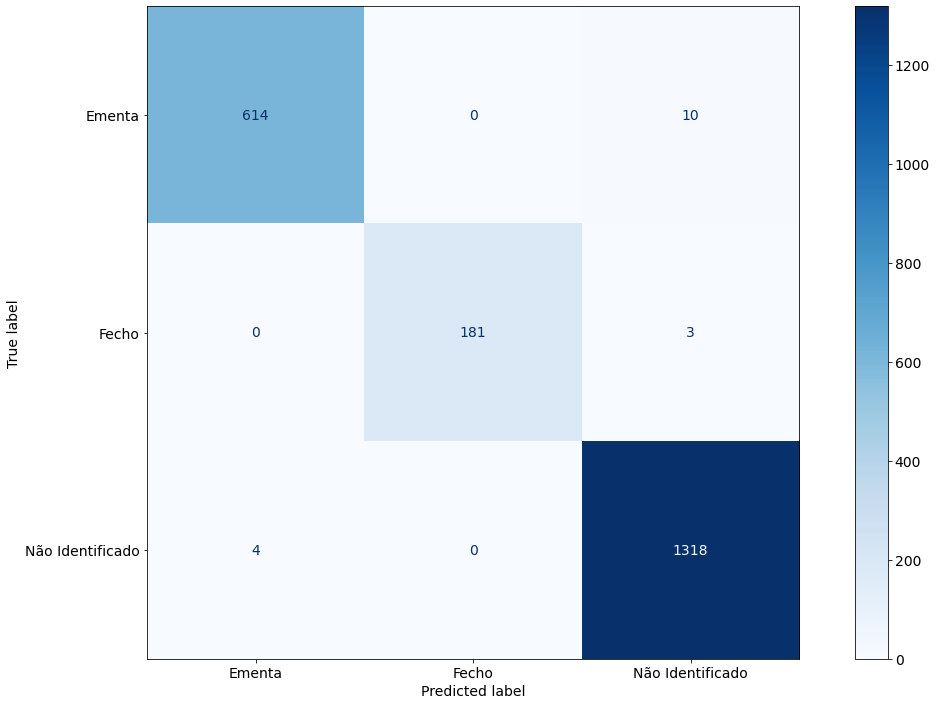

In [15]:
clf = Classificador('LinearSVC-1x1-CV', estimadorSVC_1x1_CV)
clf.treinar(dados)
clf.plotar_matriz_confusao(dados)